In [18]:
from employee import Employee
from optimization import optimization

start_date = "2023-10-01"
employees = [Employee("teresa", 38, ["19-10", "20-10", "23-10", "24-10", "25-10"], start_date), 
             Employee("daniela", 38,["2-10", "3-10"], start_date), 
             Employee("dieter", 38, ["27-10", "30-10", "31-10"], start_date),
             Employee("natalie", 37, [], start_date),
             Employee("olliver", 37, [], start_date),
             Employee("daniel", 37, ["16-10","17-10", "18-10"], start_date),
             Employee("matthias", 37, ["6-10","9-10", "10-10"], start_date),
             Employee("lisa", 37, ["16-10","17-10"], start_date)]


schedule = optimization(employees, start_date)


In [21]:
schedule

{2: {'T1': 'dieter', 'T2': 'olliver', 'T3': 'hannes'},
 3: {'T1': 'hannes', 'T2': 'matthias', 'T3': 'olliver'},
 4: {'T1': 'daniel', 'T2': 'lisa', 'T3': 'dieter'},
 5: {'T1': 'matthias', 'T2': 'olliver', 'T3': 'teresa'},
 6: {'T1': 'hannes', 'T2': 'daniela', 'T3': 'lisa'},
 9: {'T1': 'natalie', 'T2': 'daniela', 'T3': 'teresa'},
 10: {'T1': 'teresa', 'T2': 'dieter', 'T3': 'lisa'},
 11: {'T1': 'matthias', 'T2': 'olliver', 'T3': 'daniel'},
 12: {'T1': 'hannes', 'T2': 'daniel', 'T3': 'natalie'},
 13: {'T1': 'daniela', 'T2': 'teresa', 'T3': 'olliver'},
 16: {'T1': 'dieter', 'T2': 'hannes', 'T3': 'natalie'},
 17: {'T1': 'matthias', 'T2': 'dieter', 'T3': 'hannes'},
 18: {'T1': 'daniela', 'T2': 'dieter', 'T3': 'natalie'},
 19: {'T1': 'matthias', 'T2': 'dieter', 'T3': 'daniel'},
 20: {'T1': 'hannes', 'T2': 'matthias', 'T3': 'daniela'},
 23: {'T1': 'daniel', 'T2': 'daniela', 'T3': 'olliver'},
 24: {'T1': 'daniel', 'T2': 'daniela', 'T3': 'lisa'},
 25: {'T1': 'lisa', 'T2': 'matthias', 'T3': 'natal

In [19]:
count = {}

for day, slots in schedule.items():
    for slot, name in slots.items():
        if name in count:
            count[name] += 1
        else:
            count[name] = 1

print(count)

{'dieter': 8, 'olliver': 7, 'hannes': 7, 'matthias': 7, 'daniel': 7, 'lisa': 7, 'teresa': 8, 'daniela': 8, 'natalie': 7}


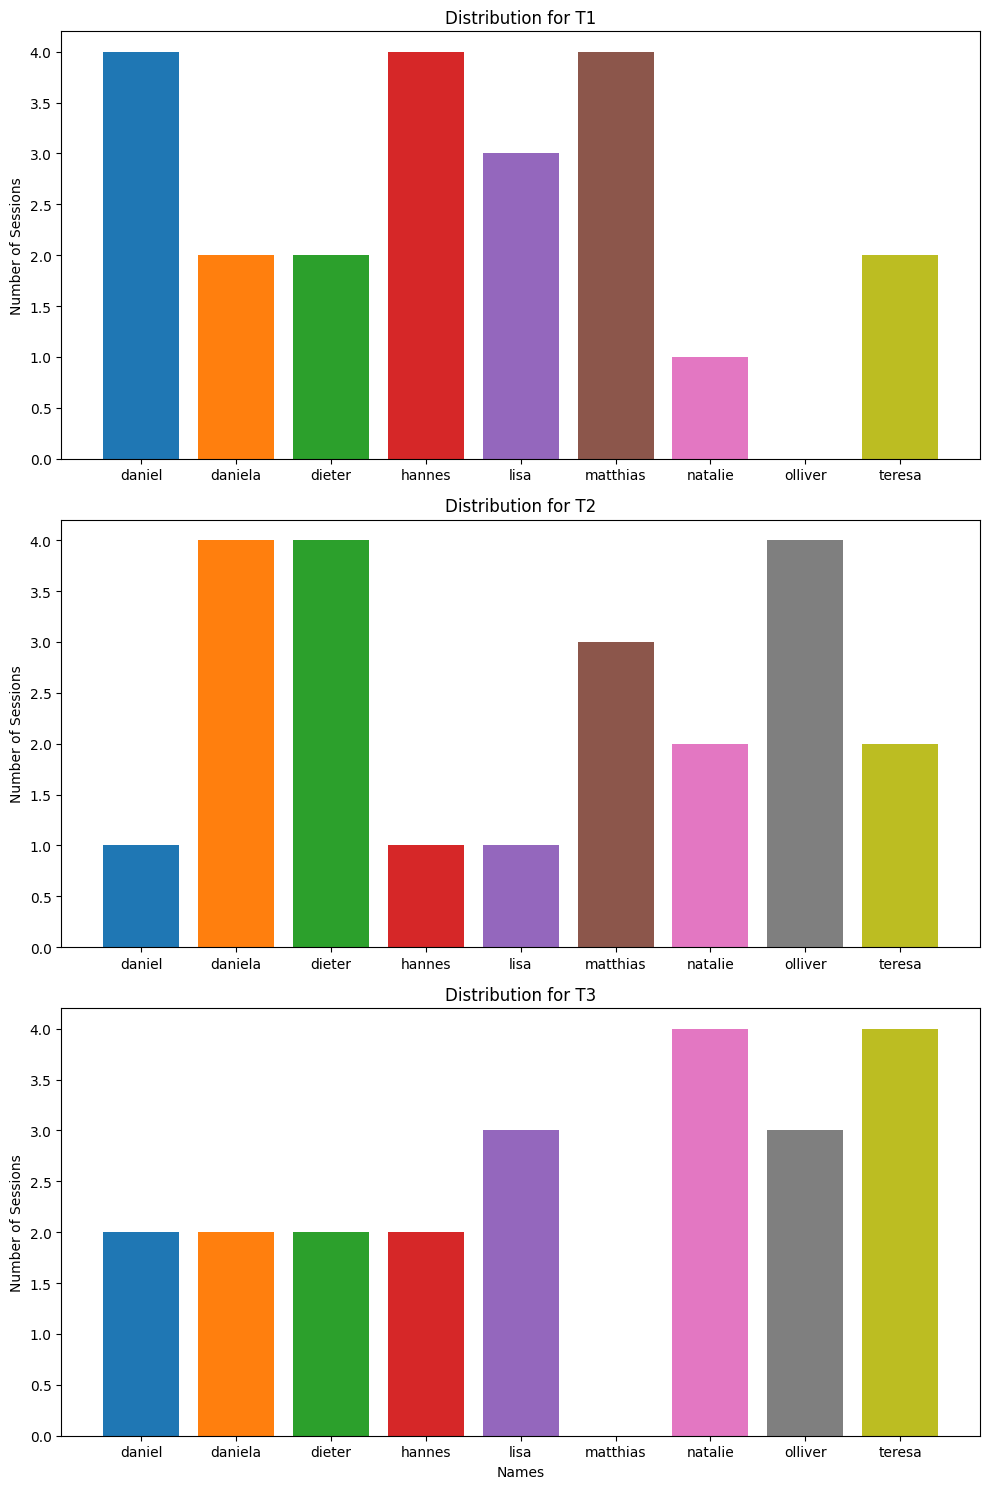

In [20]:
import matplotlib.pyplot as plt
unique_names = sorted(set(val for slots in schedule.values() for val in slots.values()))
color_map = dict(zip(unique_names, plt.cm.tab10.colors[:len(unique_names)]))

count_per_slot = {'T1': {}, 'T2': {}, 'T3': {}}

for day, slots in schedule.items():
    for slot, name in slots.items():
        if name in count_per_slot[slot]:
            count_per_slot[slot][name] += 1
        else:
            count_per_slot[slot][name] = 1

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

for idx, (slot, count) in enumerate(count_per_slot.items()):
    values = [count.get(name, 0) for name in unique_names]  # get values in consistent order
    colors = [color_map[name] for name in unique_names]
    ax[idx].bar(unique_names, values, color=colors)
    ax[idx].set_title(f"Distribution for {slot}")
    ax[idx].set_ylabel('Number of Sessions')

plt.xlabel('Names')
plt.tight_layout()
plt.show()